<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import re 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from pathlib import Path
import fnmatch

from notebook_util import categorical_plot

In [2]:
def get_data(path):
    df=pd.DataFrame(columns=['episode','ckpt','distance_to_goal','SR','SPL','collisions_count'])
    p=Path(path)
    file_list = [item.name for item in list(p.glob('*.mp4'))]
    data=list()
    for i in file_list:
        data.append(re.findall(r"\d+\.?\d*",i)[:-1])
    for i in range(len(data)):
        df.loc[i]=data[i]
    return df.astype(str).astype(float)

In [3]:
res_csvs = fnmatch.filter(os.listdir("."), "*.csv")
res_csvs

['mid_kp3d_norm.csv',
 'mid_kp3d.csv',
 'mid_kp3d_deno.csv',
 'mid_kp3d_edge.csv',
 'baseline.csv',
 'mid_kp3d_norm_curv.csv']

In [4]:
frames = []
for exp_file in res_csvs:
    exp_name = exp_file.split(".")[0]
    test_eval = pd.read_csv(exp_file)
    test_eval['episode'] = test_eval['episode'].astype(int)
    test_eval['ckpt'] = test_eval['ckpt'].astype(int)
    test_eval['collisions_count'] = test_eval['collisions_count'].astype(int)
    test_eval['policy'] = len(test_eval) * [exp_name]
    test_eval = test_eval.sort_values(['episode', 'ckpt']).reset_index(drop=True)
    frames.append(test_eval)

all_res_df = pd.concat(frames, ignore_index=True)
all_res_df.head()
    

,episode,ckpt,distance_to_goal,SR,SPL,collisions_count,policy
0,3,0,2.47,0.0,0.00,0,mid_kp3d_norm
1,3,1,1.60,0.0,0.00,10,mid_kp3d_norm
2,3,2,0.18,1.0,0.63,6,mid_kp3d_norm
3,3,3,0.21,0.0,0.00,5,mid_kp3d_norm
4,3,4,1.00,0.0,0.00,5,mid_kp3d_norm


In [5]:
all_res_ckpt50_df = all_res_df[all_res_df.ckpt==49].reset_index(drop=True)
all_res_ckpt50_df.head()

,episode,ckpt,distance_to_goal,SR,SPL,collisions_count,policy
0,3,49,0.15,1.0,0.93,0,mid_kp3d_norm
1,7,49,0.16,1.0,1.00,1,mid_kp3d_norm
2,12,49,0.11,1.0,0.93,0,mid_kp3d_norm
3,15,49,0.07,1.0,0.98,1,mid_kp3d_norm
4,16,49,0.04,1.0,1.00,3,mid_kp3d_norm


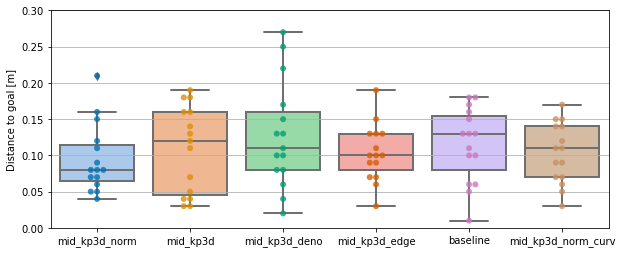

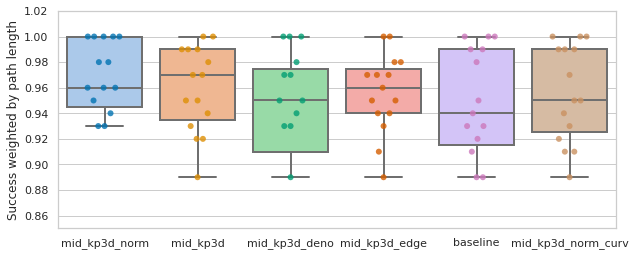

In [6]:
fig, axes = plt.subplots(figsize=(10, 4))

categorical_plot(
    axes=axes,
    df=all_res_ckpt50_df,
    metric='distance_to_goal',
    catogory='policy',
    title=None,
    xlabel='',
    ylabel='Distance to goal [m]',
    ylim=[0.0, 0.30],
    kind='box',
)

fig2, axes2 = plt.subplots(figsize=(10, 4))

categorical_plot(
    axes=axes2,
    df=all_res_ckpt50_df,
    metric='SPL',
    catogory='policy',
    title=None,
    xlabel='',
    ylabel='Success weighted by path length',
    ylim=[0.85, 1.02],
    kind='box',
)